In [20]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a pandas DataFrame
df = pd.read_csv('../data/neo.csv')


# EDA

In [15]:
# Inspect the first few rows of the dataset
print('These are the Head values',df.head())

These are the Head values         id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False 

In [13]:
# Get summary statistics
print('DESCRIBE VALUES', df.describe())

DESCRIBE VALUES                  id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07   

In [17]:
# Check for missing values
print('Missing Values', df.isnull().sum())

Missing Values id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


# Visualize the Data

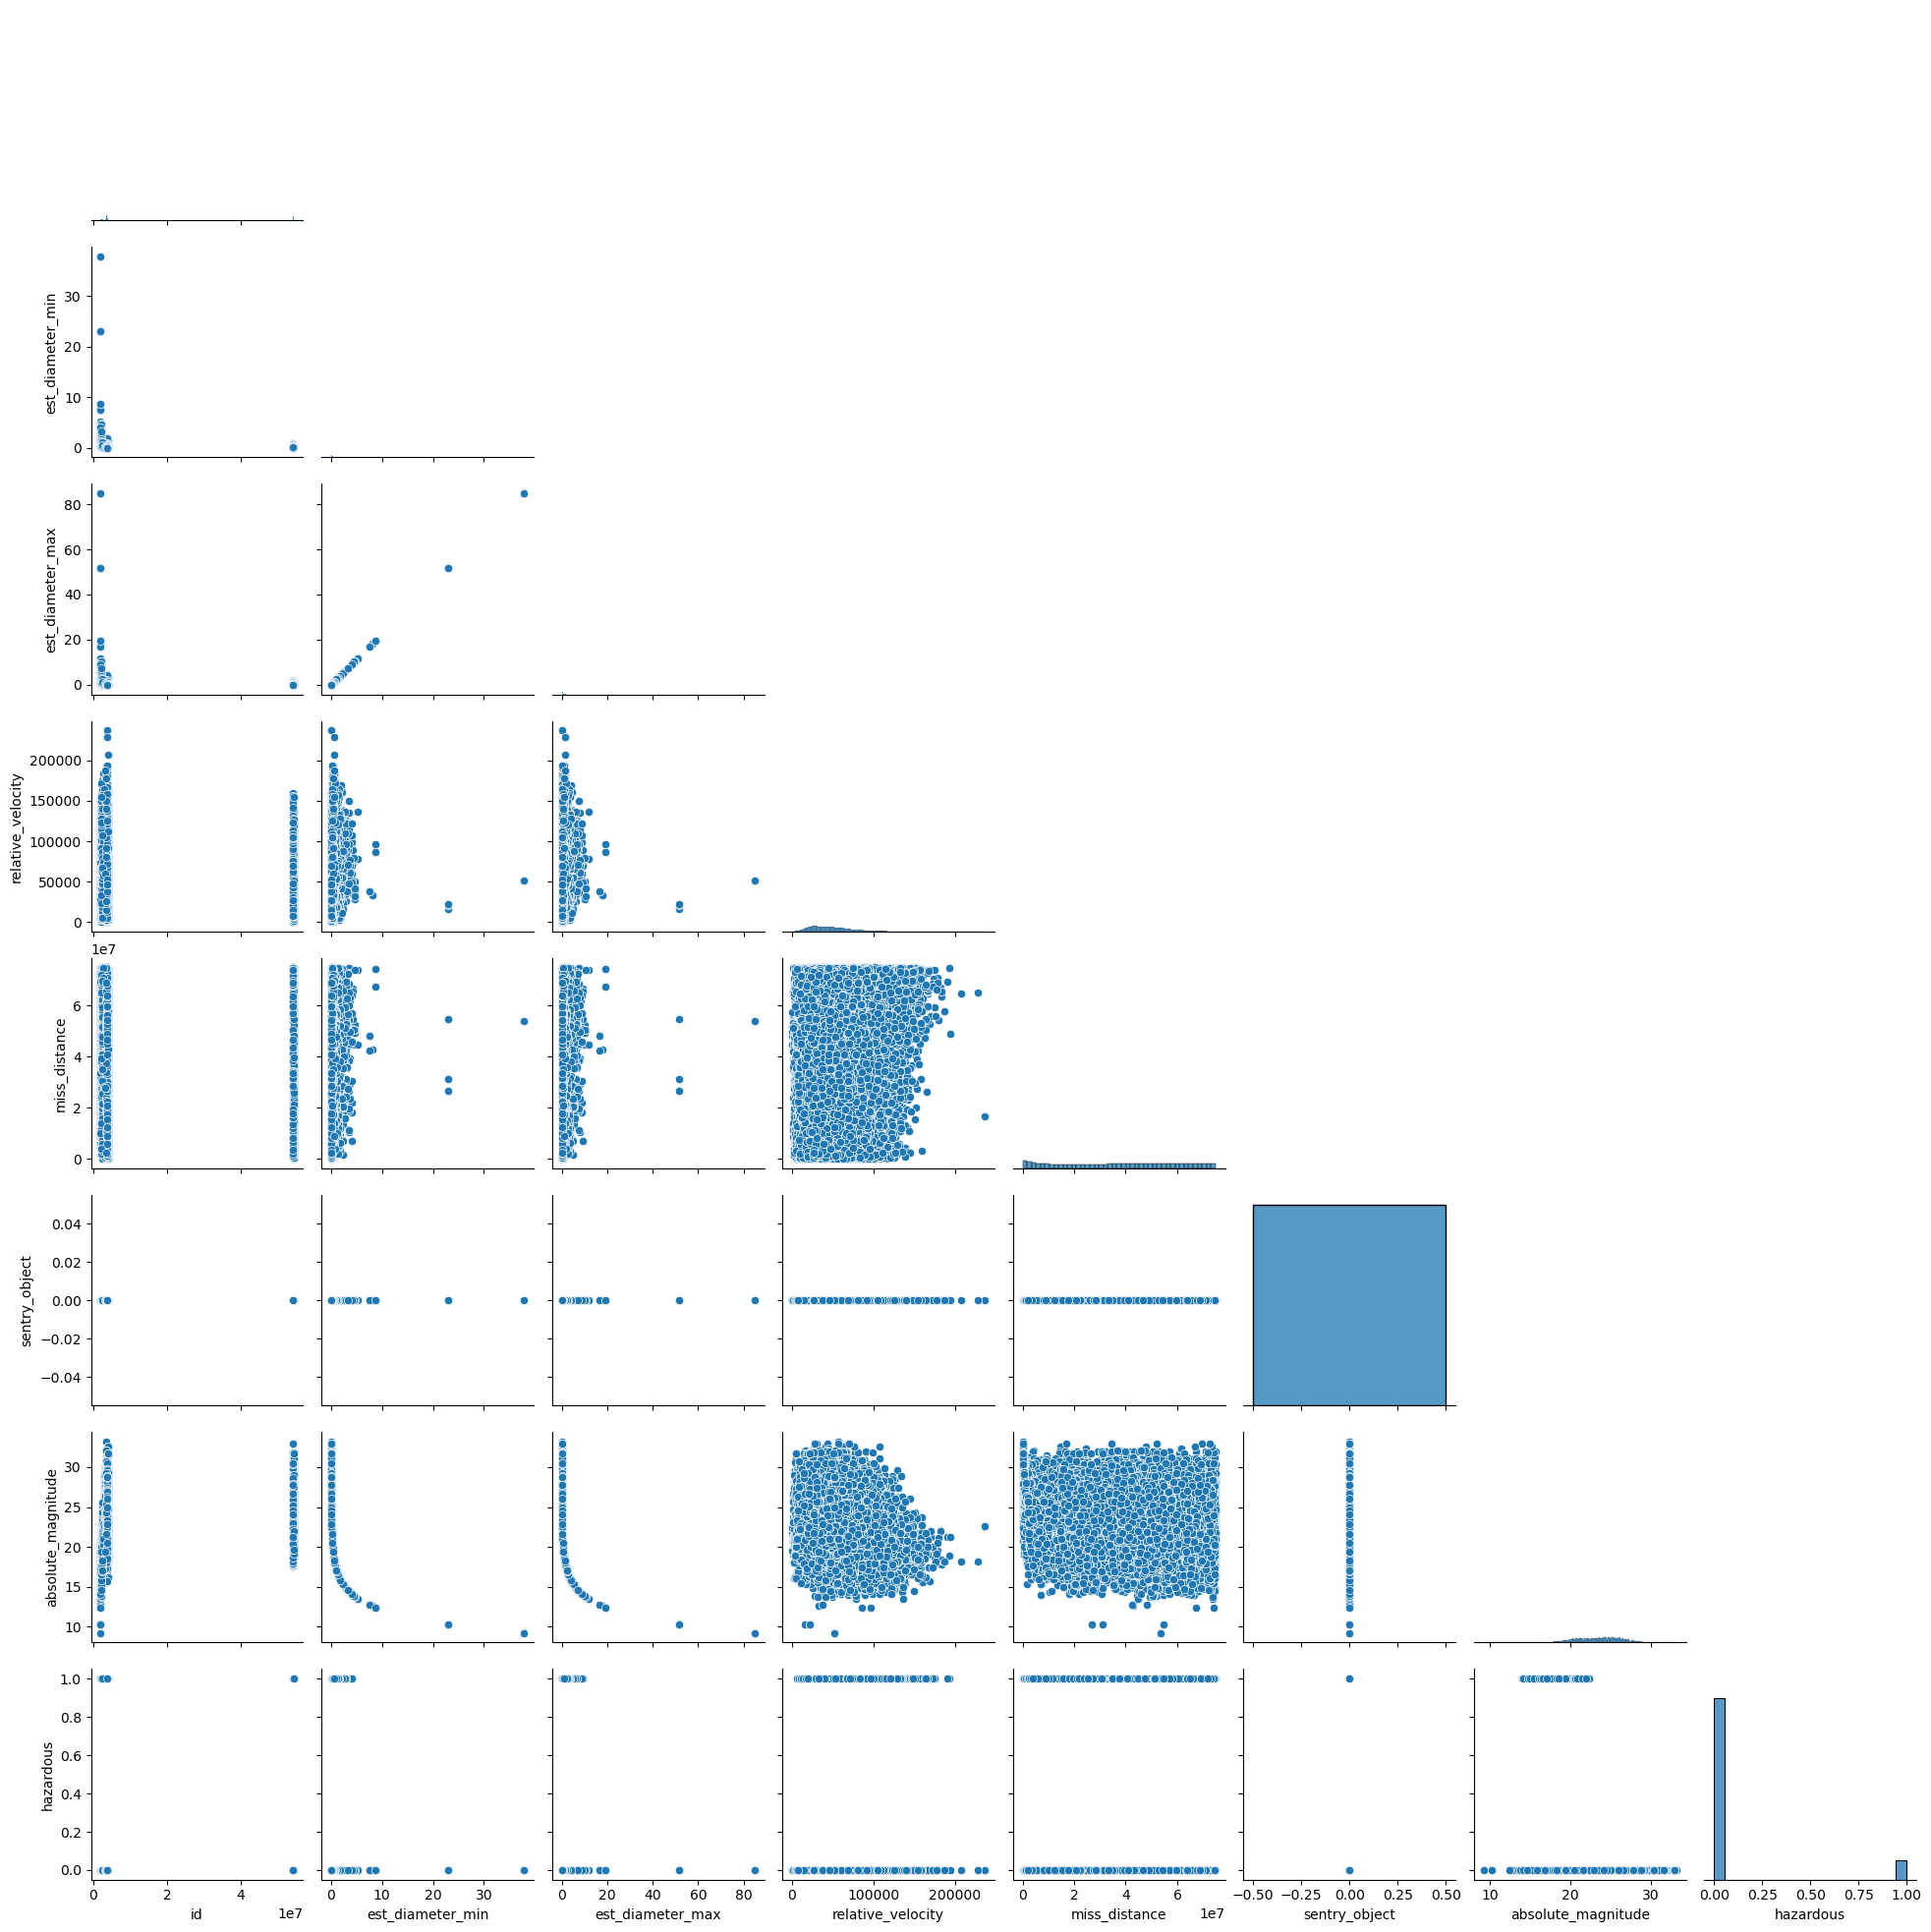

In [24]:
sns.pairplot(data=df, corner=True)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'est_diameter_min'}>],
       [<Axes: title={'center': 'est_diameter_max'}>,
        <Axes: title={'center': 'relative_velocity'}>],
       [<Axes: title={'center': 'miss_distance'}>,
        <Axes: title={'center': 'absolute_magnitude'}>]], dtype=object)

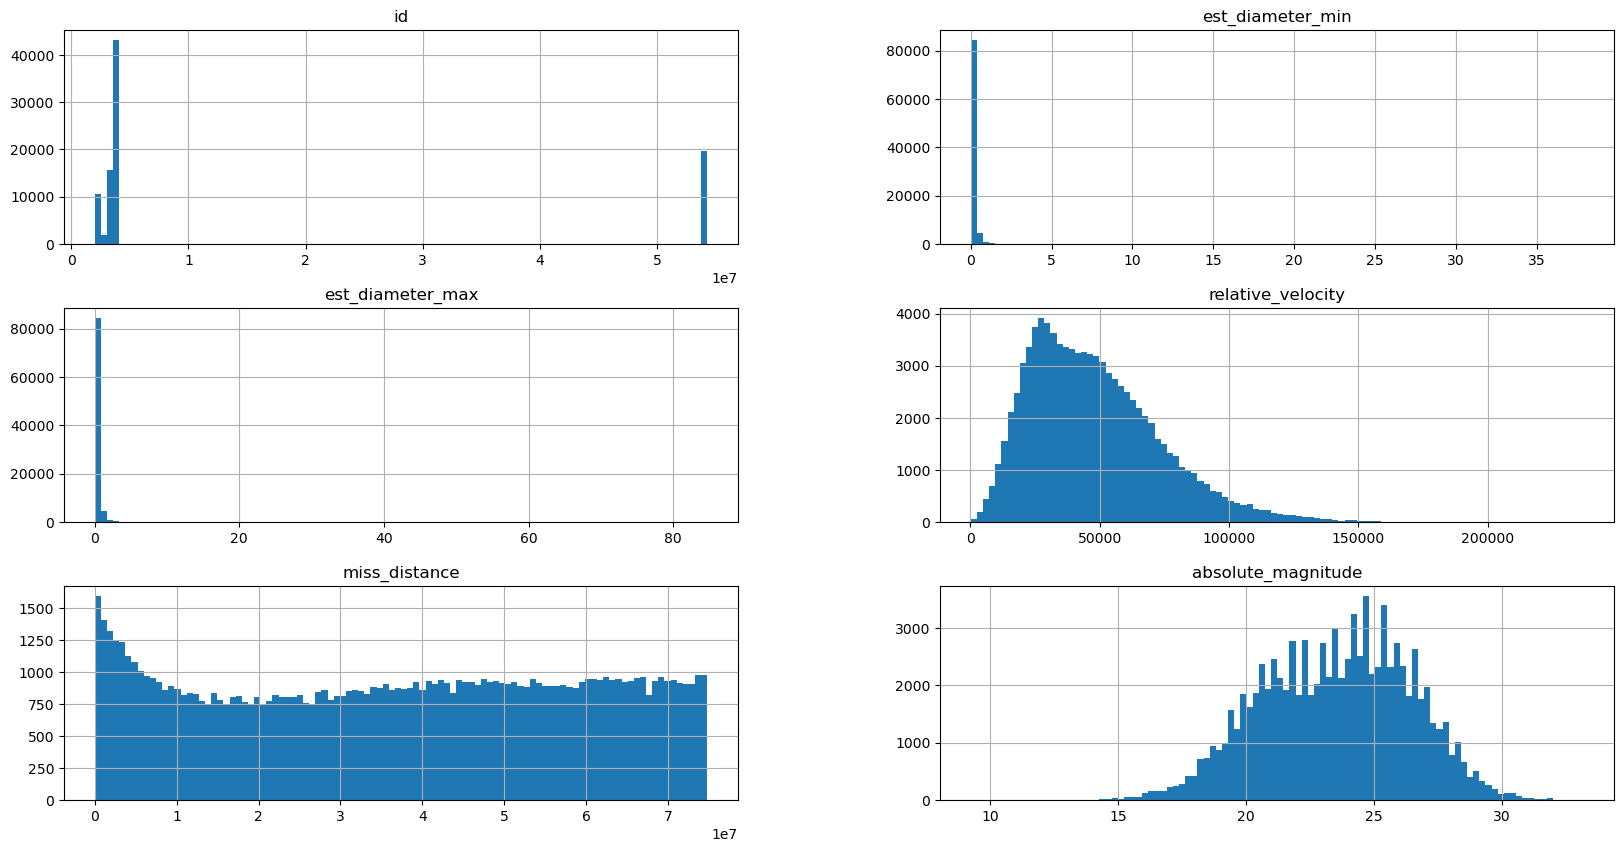

In [23]:
df.hist(bins=100, figsize = [20, 10])

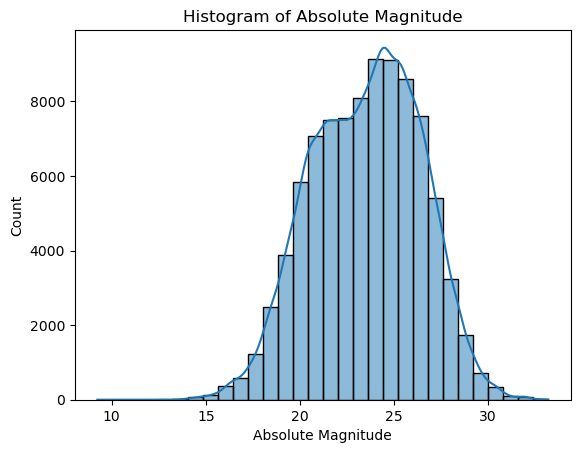

In [18]:
# Visualize the data (e.g., histograms, box plots, scatter plots, etc.)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Histogram for absolute_magnitude
plt.figure()
sns.histplot(df['absolute_magnitude'], bins=30, kde=True)
plt.xlabel('Absolute Magnitude')
plt.title('Histogram of Absolute Magnitude')
plt.show()


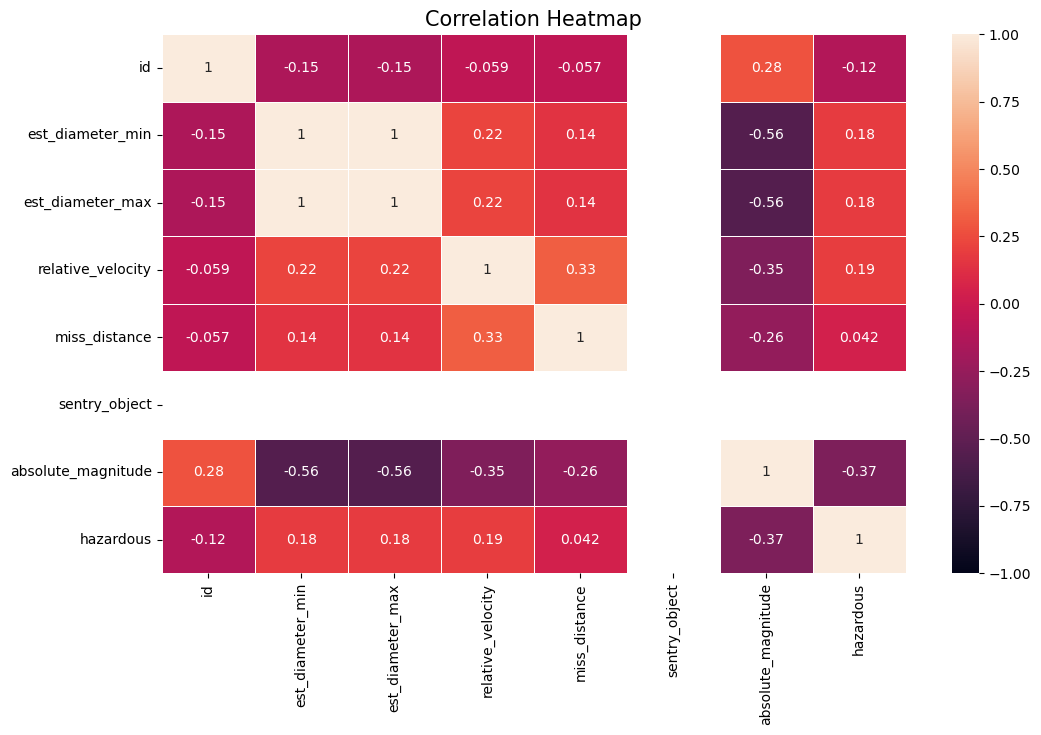

In [25]:
plt.figure(figsize = (12, 7))
sns.heatmap((df).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

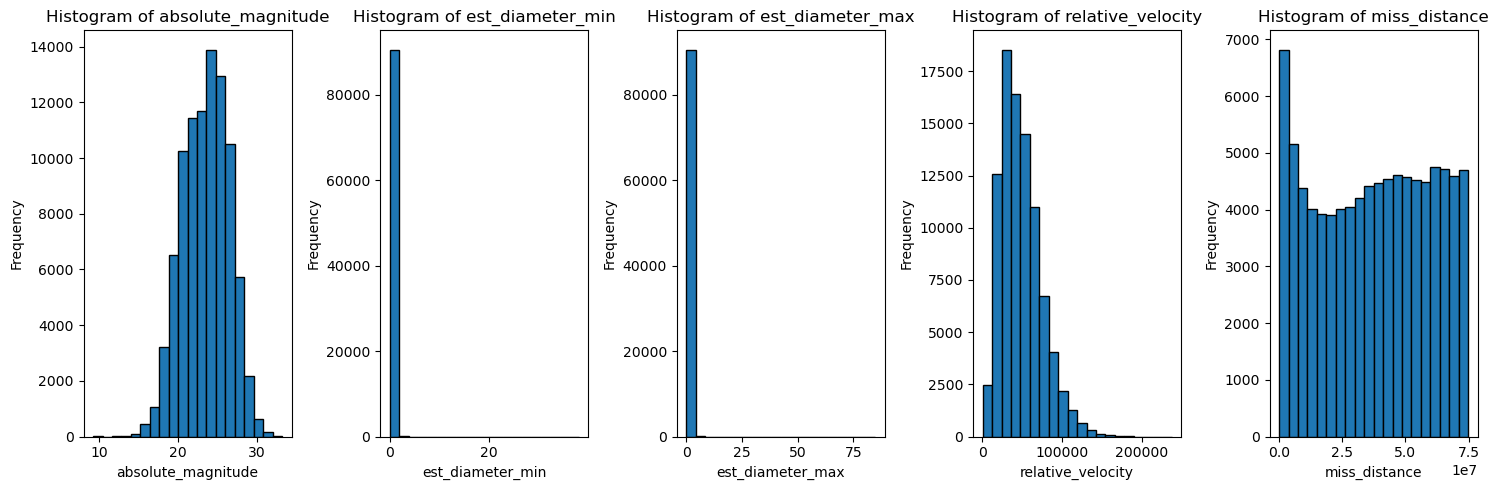

In [26]:
numerical_features = ['absolute_magnitude', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance']

# Create side-by-side histograms using subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Data Processing

In [3]:
# Handle missing values (if any) - this step might vary depending on the dataset

# Convert categorical variables to numerical using one-hot encoding (if necessary)
df = pd.get_dummies(df, columns=['orbiting_body'], drop_first=True)


# Hypothesis Formulation:
The hypothesis formulation was provided earlier:
H null = absolute magnitude is not related to hazardous.
H alt = absolute magnitude is related to hazardous.

# Statistical Tests

In [6]:
# Chi-Square Test or Fisher's Exact Test for Categorical Variables
from scipy import stats

contingency_table = pd.crosstab(df['absolute_magnitude'], df['hazardous'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square:", chi2_stat)
print("p-value:", p_value)

# Shapiro-Wilk Test for Normality (here, we demonstrate it for 'absolute_magnitude')
shapiro_stat, shapiro_p_value = stats.shapiro(df['absolute_magnitude'])
print("Shapiro-Wilk Test (Absolute Magnitude):")
print("Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p_value)

# Mann-Whitney U Test for comparing two groups
non_hazardous = df[df['hazardous'] == False]['absolute_magnitude']
hazardous = df[df['hazardous'] == True]['absolute_magnitude']
mwu_stat, mwu_p_value = stats.mannwhitneyu(non_hazardous, hazardous, alternative='two-sided')
print("Mann-Whitney U Test - Two-Sided:")
print("p-value:", mwu_p_value)


Chi-Square: 30548.559247361845
p-value: 0.0
Shapiro-Wilk Test (Absolute Magnitude):
Test Statistic: 0.994188666343689
p-value: 0.0
Mann-Whitney U Test - Two-Sided:
p-value: 0.0


# Machine Learning Models (Logistic Regression):

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the dataset into features (X) and the target variable (y)
X = df[['absolute_magnitude']]
y = df['hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Evaluate the model's performance
y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Interpret the results from the logistic regression summary
import statsmodels.api as sm

# Add an intercept column to the data
X = sm.add_constant(X)

# Create and fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the logistic regression summary
print(result.summary())


Accuracy: 0.8954205195948921
              precision    recall  f1-score   support

       False       0.91      0.98      0.94     16439
        True       0.28      0.06      0.10      1729

    accuracy                           0.90     18168
   macro avg       0.59      0.52      0.52     18168
weighted avg       0.85      0.90      0.86     18168

[[16163   276]
 [ 1624   105]]
Optimization terminated successfully.
         Current function value: 0.247418
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              hazardous   No. Observations:                90836
Model:                          Logit   Df Residuals:                    90834
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Aug 2023   Pseudo R-squ.:                  0.2248
Time:                        15:26:34   Log-Likelihood:                -22474.
converged:                       True

Model Evaluation Metrics:
You can calculate MSE or RMSE for regression models and accuracy, precision, recall, etc., for classification models. The code provided in the logistic regression step already includes the accuracy metric.

# Visualization:

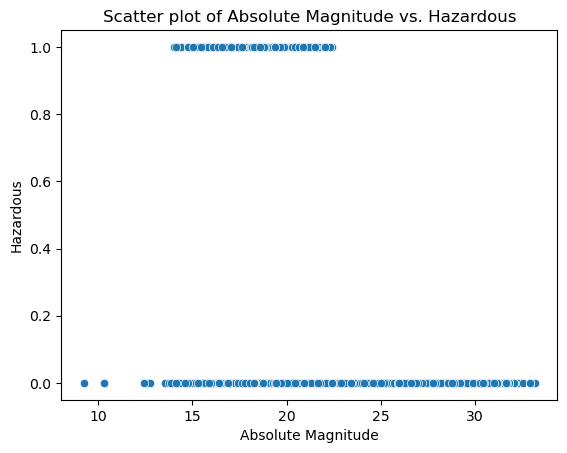

In [8]:
# Create visualizations to present your findings
# You can add more visualization based on the insights you want to convey.
plt.figure()
sns.scatterplot(x='absolute_magnitude', y='hazardous', data=df)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Hazardous')
plt.title('Scatter plot of Absolute Magnitude vs. Hazardous')
plt.show()


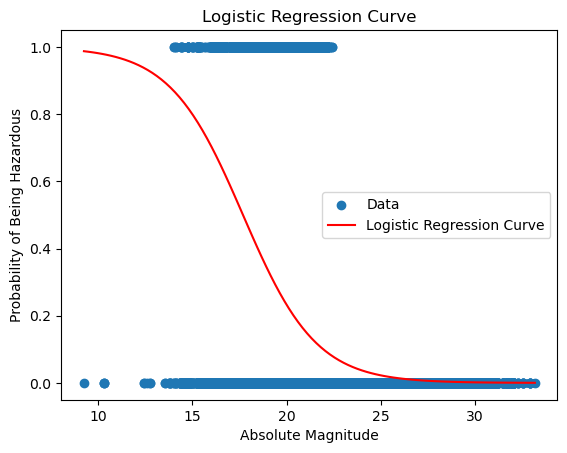

In [21]:
## from before. this is a better graph

# Plot the logistic regression curve
plt.scatter(X['absolute_magnitude'], y, marker='o', label='Data')
X_pred = np.linspace(X['absolute_magnitude'].min(), X['absolute_magnitude'].max(), 100)
X_pred = sm.add_constant(X_pred)
y_pred = result.predict(X_pred)
plt.plot(X_pred[:, 1], y_pred, color='red', label='Logistic Regression Curve')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Probability of Being Hazardous')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()

Conclusion:
Based on the analysis and results from the statistical tests and machine learning models, you can draw conclusions and provide insights.
Remember, this is just a basic outline, and you can further customize and enhance the analysis based on your project's specific requirements and goals.